In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

Part 1: Encoding and decoding
===

I have some encoder that will put cat to `[-8,-4]` and dog to `[-6,-3]`. It will then decode to `[3,-1]` for animal. In addition, I have car is `[2,-5]`, truck at `[7,-6]`, and these decode to machine `[-6,-5]`. For T(v) = A.v, I need to solve for a

Problem 1a: Dimensions of A
---

Because we are putting in a 2D vector and getting out a 2D vector, this means that A will be a 2x2 matrix. 
The formula for matrix size is mxn dot nxp = mxp

In this formula, we know n is 2 and p is 1 since v is a 2x1 vector. Also, m is 2 since T(v) is a 2x1 vector. This means that A must be a 2x2 matrix since m = n = 2. 


Problem 1b: Least squares model
---

Now, I want to find the error of the least squares solution as a matrix expression.
In terms of a that would be:

> Total_e = ||(-8,-4).A.T - (3,-1)||^2 + ||(-6,-3).A.T - (3,-1)||^2 + ||(2,-5).A.T - (-6,-5)||^2 + ||(7,-6).A.T - (-6,-5)||^2

This is the total error in terms of A

Problem 1c: Finding the least square solution
---

Now, lets use technology to find out what A is


In [2]:

B = np.array([[-8, -4], [-6, -3], [2, -5], [7, -6]])
target = np.array([[3, -1], [3, -1], [-6, -5], [-6, -5]])

X, x, y, z = np.linalg.lstsq(B, target, rcond=None)
# Note! We want the transpose!!
A = X.T
print("Our matrix A is: ")
print(A)

Our matrix A is: 
[[-0.62079976  0.50881861]
 [-0.1932492   0.71643607]]


Problem 1d: Finding mean least square error
---

Now that we have our array A, we can plug it into our equation we came up in part 1b to get our error. However, I will do it more condensed. I will do my B.X - target, then square each term


In [3]:
# Finding the error vectors
ErrorVecs = np.dot(B,X) - target

# Going through and squaring each norm. Then adding it on
total_e = 0
for vec in ErrorVecs:
    total_e += (np.linalg.norm(vec) ** 2)

print("The total error is: ", total_e)

# Find the number of rows to get the mean, and divide
rows, cols = B.shape
mean_e = (total_e / rows)
print()
print("The mean error is: ", mean_e)


The total error is:  9.096624600881862

The mean error is:  2.2741561502204655


Problem 1e: Looking for error of mapping 'mouse'
---

Now, we want to do A.mouse, and then find the error compared to animal and mouse

In [4]:
mouse = np.array([-5,3])

mouse_animal = np.linalg.norm(np.dot(A, mouse) - (target[0,:]))**2
mouse_machine = np.linalg.norm(np.dot(A, mouse) - (target[2,:]))**2

print("The error between mouse and animal is: ", mouse_animal)
print()
print("The error between mouse and machine is: ", mouse_machine)

# I would say that this mapping is pretty good. The error is much less for animal then machine


The error between mouse and animal is:  19.596168656586777

The error between mouse and machine is:  178.86878535112837


Problem 1f: plotting it all
---

Now, to plot it all and make it look pretty


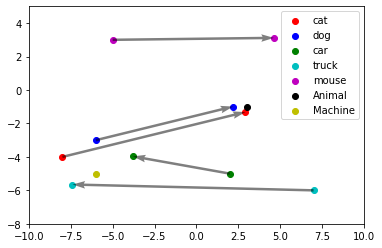

In [5]:
# Adding in mouse to our vectors
Bmouse = np.vstack([B, mouse])

# An array of encoded points
encoded = (np.dot(A,Bmouse.T)).T

# The starting x and y points of all the points
og_xs = Bmouse[:,0]
og_ys = Bmouse[:,1]

# The encoded x and y points for all things
en_xs = encoded[:,0]
en_ys = encoded[:,1]

# Now, going through to plot each point
plt.figure()
words = ['cat', 'dog', 'car', 'truck','mouse']
color = ['r', 'b', 'g', 'c', 'm']
for i, w in enumerate(words):
    plt.scatter(og_xs[i], og_ys[i], c=color[i], label=w)
    plt.scatter(en_xs[i],en_ys[i], c=color[i])

plt.scatter(target[0,0], target[0,1], c='k', label='Animal')
plt.scatter(target[2,0], target[2,1], c='y', label='Machine')

# We want the vectors to start on the original points, and then get mapped to the new ones. 
# To do this, find vector direction by doing new - orginal points
# Personal note, the angles, scale_units, and scale kwargs are how to get these nice 1 to 1 mapping vectors
plt.quiver(og_xs, og_ys, (en_xs - og_xs), (en_ys - og_ys), angles='xy', scale_units='xy', scale = 1, alpha=.5)

plt.legend(loc=1)   # <-- 1 means top right
plt.xlim(-10,10)
plt.ylim(-8,5)
plt.show()

Problem 2
===

In [6]:
# First, get a new B and target such that mouse and bus are included
B2 = np.array([[-8, -4], [-6, -3], [-5, 3], [2, -5], [7, -6], [-2, 2]])
target2 = np.array([[3, -1], [3, -1], [3, -1], [-6, -5], [-6, -5], [-6, -5]])

Problem 2a: Looking at bus
---

Now, we want to check out bus, which should be transformed from `[-2,2]` to machine. 
The model this time is U(v) = dot(M,v) + b for some M and b. Working backwards, we want a 2x1 vector to be our point U(v), so dot(M,v) + b must result in a 2x1 vector. This means that b must be 2x1, as well as dot(M,v). The multiplication equation here is mxn dot nxp = mxp, and once again n is 2 and m is 2, so M is 2x2

Problem 2b and 2c: converting into matrix form
---

Next, I want to find X such that U(v) = U(v') = X dot v'. This will allow us to derive M and b


In [7]:
# Augment the B2, think of this as a linear regression problem
rows, c = B2.shape
B2aug = np.hstack((B2,np.ones((rows,1))))

print("Augemented B2 is: ")
print(B2aug)
print()

# Now lets get X
X2, j, k, l = np.linalg.lstsq(B2aug, target2, rcond=None)
print("Our X is: ")
print(X2)
xrow, xcol = X2.shape
print("The dimension of X is", xrow, "x", xcol)


Augemented B2 is: 
[[-8. -4.  1.]
 [-6. -3.  1.]
 [-5.  3.  1.]
 [ 2. -5.  1.]
 [ 7. -6.  1.]
 [-2.  2.  1.]]

Our X is: 
[[-0.80488348 -0.35772599]
 [-0.2164168  -0.09618525]
 [-3.57867003 -3.92385335]]
The dimension of X is 3 x 2


Problem 2d:
---

So first we want to use an augmented point of [0,0,1] to find out b2. This is similar to plugging 0 into y = mx + b for a normal line. Then, I can take the b out to get my M

In [8]:
# Use augemnted point to get b2
b2 = np.dot([0,0,1], X2)
print("b is: ")
print(b2)
print()

# This is the last row of X!! So that means that M will just be the first two rows of X. 
M = np.array([X2[0], X2[1]])
print("Our matrix M is: ")
print(M)

# Probably a more mathematically sound way to do this would be...
# I want to do a nice 3x2 symbolic matrix. Then, and dot that with (x, y, 1). That sould show that 
# xm11 + ym12 + m31
# xm21 + ym22 + m32
# This shows that if we pass in (0,0,1) I should get b. Also, b is the last row which means that M is the first square part

b is: 
[-3.57867003 -3.92385335]

Our matrix M is: 
[[-0.80488348 -0.35772599]
 [-0.2164168  -0.09618525]]


Problem 2e: Plot it!
---

I want to make a similar plot to 1f above. That will allow me to see how the mappings compare

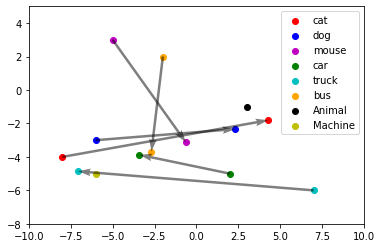

In [9]:
# An array of encoded points
encoded2 = (np.dot(M,B2.T).T + np.broadcast_to(b2,(rows, len(b2))))
#print(encoded2)

# The starting x and y points of all the points
og_xs2 = B2[:,0]
og_ys2 = B2[:,1]

# The encoded x and y points for all things
en_xs2 = encoded2[:,0]
en_ys2 = encoded2[:,1]

# Now, going through to plot each point
plt.figure()
words2 = ['cat', 'dog', 'mouse', 'car','truck','bus']
color2 = ['r', 'b', 'm', 'g', 'c', 'orange']
for i, w in enumerate(words2):
    plt.scatter(og_xs2[i], og_ys2[i], c=color2[i], label=w)
    plt.scatter(en_xs2[i],en_ys2[i], c=color2[i])

plt.scatter(target2[0,0], target2[0,1], c='k', label='Animal')
plt.scatter(target2[3,0], target2[3,1], c='y', label='Machine')

# We want the vectors to start on the original points, and then get mapped to the new ones. 
# To do this, find vector direction by doing new - orginal points
# Personal note, the angles, scale_units, and scale kwargs are how to get these nice 1 to 1 mapping vectors
plt.quiver(og_xs2, og_ys2, (en_xs2 - og_xs2), (en_ys2 - og_ys2), angles='xy', scale_units='xy', scale = 1, alpha=.5)

plt.legend(loc=1)   # <-- 1 means top right
plt.xlim(-10,10)
plt.ylim(-8,5)
plt.show()

Well, comparing this to the image in part 1f, I would say this seems worse. Truck and maybe car are mapped better, but the animals are mapped poorly. However this does put all the points on a nice linear line that seems to go from machine to animal

Problem 3: Inverses
===

Problem 3a: Find the inverse of A1
---

In [10]:
A1 = np.array([[0, 7], [-8, 3]])
A1inv = np.linalg.inv(A1)
print("Our inverted matrix is: ")
print(A1inv)


Our inverted matrix is: 
[[ 0.05357143 -0.125     ]
 [ 0.14285714  0.        ]]


Problem 3b: Finding the pseudoinverse of A2
---

Use np.linalg.pinv() to get the Pseudomatrix



In [11]:
A2 = np.array([[0, 7], [-8, 3], [0, -1]])
A2pinv = np.linalg.pinv(A2)
print("The psuedoinverse is: ")
print(A2pinv)
print()

print("Lets round this to 8 decimal places to clean it up: ")
print(A2pinv.round(decimals=8))

The psuedoinverse is: 
[[ 5.25000000e-02 -1.25000000e-01 -7.50000000e-03]
 [ 1.40000000e-01 -9.14594931e-18 -2.00000000e-02]]

Lets round this to 8 decimal places to clean it up: 
[[ 0.0525 -0.125  -0.0075]
 [ 0.14   -0.     -0.02  ]]


Problem 3c: Find another Psuedo
---

Again, just use np.linalg.pinv()

In [12]:
A3 = np.array([[0, 7], [-8, 3], [0, -1], [1, 0]])
A3pinv = np.linalg.pinv(A3)
print("The psuedoinverse is: ")
print(A3pinv)

The psuedoinverse is: 
[[ 0.05154956 -0.12273704 -0.00736422  0.01810371]
 [ 0.13961338  0.00092053 -0.01994477  0.00736422]]


Problem 3d: comparing the matricies
---

Now, lets compare. 

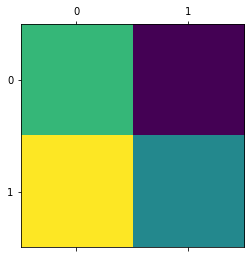

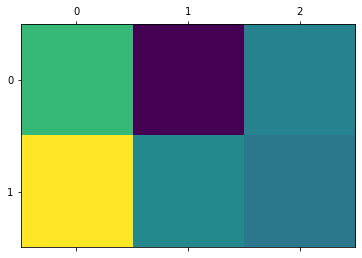

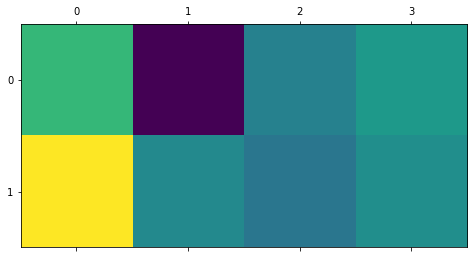

In [13]:
plt.matshow(A1inv)
plt.matshow(A2pinv)
plt.matshow(A3pinv)
plt.show()

It becomes very obvious that the first part of the matricies are all very similar. The colors line up well. Furthermore, it even looks like additional rows will be similar, such as how A2pinv column 2 is similar to A3pinv 2.

In [14]:
# We can visually compare the difference too, rounding everything to 5 decimal places to see how close they are
print(A1inv.round(decimals=5))
print()
print(A2pinv.round(decimals=5))
print()
print(A3pinv.round(decimals=5))

[[ 0.05357 -0.125  ]
 [ 0.14286  0.     ]]

[[ 0.0525 -0.125  -0.0075]
 [ 0.14   -0.     -0.02  ]]

[[ 0.05155 -0.12274 -0.00736  0.0181 ]
 [ 0.13961  0.00092 -0.01994  0.00736]]
